# 31009 Assignment 5: Support Vector Machines 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics as skm
from sklearn import svm

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## 1. Data Processing:

In [2]:
tn = pd.read_csv('data/train_data5.csv')
tt = pd.read_csv('data/test_data5.csv')

tn = tn.dropna(how='any', axis = 0)
tt = tt.dropna(how='any', axis = 0)

print(tn.shape)
print(tt.shape)

(507, 148)
(168, 148)


In [3]:
tt.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38


In [4]:
y_train = tn['class']
y_test  = tt['class']

tn.drop(columns='class', inplace=True)
tt.drop(columns='class', inplace=True)

scaler = StandardScaler()
scaler.fit(tn)

X_train_scaled = pd.DataFrame(scaler.transform(tn), columns=tn.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(tt), columns=tt.columns)

In [5]:
X_test_scaled.head()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,-1.221577,-0.675542,-0.476591,1.041138,-0.912836,-1.124818,0.703688,1.082655,1.094633,2.152514,...,0.129506,-0.188670,-3.000051,1.278539,-2.234303,0.474507,0.183615,-0.803547,-1.224828,5.070035
1,0.540344,-0.460631,0.574291,0.800037,0.312553,0.324191,0.364434,0.914359,0.903921,-0.837096,...,-0.189572,-0.138043,-0.261676,-0.241913,0.471713,-0.168031,0.621794,-0.878340,0.316804,0.652683
2,0.152398,-0.424813,0.413987,1.053803,-0.134084,-0.093792,0.680361,1.116450,1.113446,-0.919693,...,-0.739139,-0.150193,-0.544956,0.721040,-1.027395,0.496664,0.621794,-0.728753,-0.759601,-0.014920
3,0.637331,-0.234259,0.075567,1.025624,0.346910,0.630713,0.647568,1.103504,1.077974,-1.000276,...,-0.909751,0.082694,0.021605,0.721040,-0.773309,-0.212344,1.059973,-0.878340,-0.201330,0.043835
4,0.200891,0.546581,0.877087,0.436406,0.106413,2.539504,-0.005246,0.589486,0.570749,0.148025,...,-0.734218,9.548045,0.304885,-0.546003,0.128697,-2.716028,1.378648,-0.803547,4.408971,0.083205


## 2. Random Forest Classifier - Base Model

In [6]:
rf = RandomForestClassifier()

rf.fit(X_train_scaled, y_train)

y_tn_pred_rf = rf.predict(X_train_scaled)
y_tt_pred_rf = rf.predict(X_test_scaled)

In [7]:
print("Random Forest Train Score:", rf.score(X_train_scaled, y_tn_pred_rf))
print("\nRandom Forest Train Confusion Matrix")
print(skm.confusion_matrix(y_train, y_tn_pred_rf))
print("\nRandom Forest Train Classification Report")
print(skm.classification_report(y_train, y_tn_pred_rf))
print('-'*53 + '\n')
print("Random Forest Test Score:", rf.score(X_test_scaled, y_tt_pred_rf))
print("\nRandom Forest Test Confusion Matrix")
print(skm.confusion_matrix(y_test, y_tt_pred_rf))
print("\nRandom Forest Test Classification Report")
print(skm.classification_report(y_test, y_tt_pred_rf))

Random Forest Train Score: 1.0

Random Forest Train Confusion Matrix
[[45  0  0  0  0  0  0  0  0]
 [ 0 96  0  1  0  0  0  0  0]
 [ 0  1 20  0  0  0  0  0  0]
 [ 0  0  0 93  0  0  0  0  0]
 [ 0  0  0  0 83  0  0  0  0]
 [ 0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0 89]]

Random Forest Train Classification Report
             precision    recall  f1-score   support

   asphalt        1.00      1.00      1.00        45
  building        0.99      0.99      0.99        97
       car        1.00      0.95      0.98        21
  concrete        0.99      1.00      0.99        93
     grass        1.00      1.00      1.00        83
      pool        1.00      1.00      1.00        14
    shadow        1.00      1.00      1.00        45
      soil        1.00      1.00      1.00        20
      tree        1.00      1.00      1.00        89

avg / total       1.00      1.00      1.00       507

-------------------------------

In [8]:
feature_importances = pd.DataFrame({'feature':tn.columns, 'importance':rf.feature_importances_})
feature_importances.sort_values('importance', ascending=False, inplace=True)

Text(0.5,1,'Feature Importance of Random Forest Base Model')

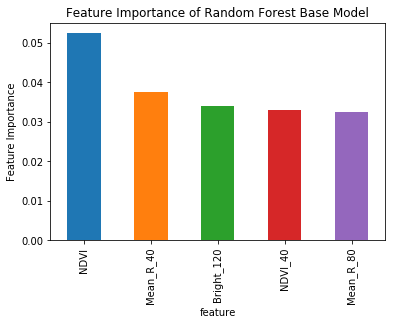

In [9]:
ax = feature_importances.iloc[:5,].plot.bar(x='feature',y='importance', legend=False)
ax.set_ylabel('Feature Importance')
ax.set_title('Feature Importance of Random Forest Base Model')

## 3. LinearSVM Classifier - Base Model

In [10]:
svc = svm.LinearSVC()
svc.fit(X_train_scaled, y_train)

y_tn_pred_svc = svc.predict(X_train_scaled)
y_tt_pred_svc = svc.predict(X_test_scaled)

In [11]:
print("LinearSVM  Train Score:", svc.score(X_train_scaled, y_tn_pred_svc))
print("\nLinearSVM  Train Confusion Matrix")
print(skm.confusion_matrix(y_train, y_tn_pred_svc))
print("\nLinearSVM  Train Classification Report")
print(skm.classification_report(y_train, y_tn_pred_svc))
print('-'*53 + '\n')
print("LinearSVM  Test Score:", svc.score(X_test_scaled, y_tt_pred_svc))
print("\nLinearSVM  Test Confusion Matrix")
print(skm.confusion_matrix(y_test, y_tt_pred_svc))
print("\nLinearSVM  Test Classification Report")
print(skm.classification_report(y_test, y_tt_pred_svc))

LinearSVM  Train Score: 1.0

LinearSVM  Train Confusion Matrix
[[45  0  0  0  0  0  0  0  0]
 [ 0 97  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0]
 [ 0  0  0 93  0  0  0  0  0]
 [ 0  1  0  0 80  0  0  0  2]
 [ 0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0 89]]

LinearSVM  Train Classification Report
             precision    recall  f1-score   support

   asphalt        1.00      1.00      1.00        45
  building        0.99      1.00      0.99        97
       car        1.00      1.00      1.00        21
  concrete        1.00      1.00      1.00        93
     grass        1.00      0.96      0.98        83
      pool        1.00      1.00      1.00        14
    shadow        1.00      1.00      1.00        45
      soil        1.00      1.00      1.00        20
      tree        0.98      1.00      0.99        89

avg / total       0.99      0.99      0.99       507

----------------------------------------

## 4. Support Vector Machine Classifier + Linear Kernel + Grid Search

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
C_arr = np.arange(0.0, 10, 0.2)
C_arr[0] = 0.01
C_arr = np.append(C_arr, 10)

In [14]:
parameters = {'C': C_arr}

svc = svm.SVC(kernel='linear')

In [15]:
grid_search = GridSearchCV(svc, parameters, cv=5, refit=True, n_jobs=-1, verbose=0, return_train_score=True)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([ 0.01,  0.2 ,  0.4 ,  0.6 ,  0.8 ,  1.  ,  1.2 ,  1.4 ,  1.6 ,
        1.8 ,  2.  ,  2.2 ,  2.4 ,  2.6 ,  2.8 ,  3.  ,  3.2 ,  3.4 ,
        3.6 ,  3.8 ,  4.  ,  4.2 ,  4.4 ,  4.6 ,  4.8 ,  5.  ,  5.2 ,
        5.4 ,  5.6 ,  5.8 ,  6.  ,  6.2 ,  6.4 ,  6.6 ,  6.8 ,  7.  ,
        7.2 ,  7.4 ,  7.6 ,  7.8 ,  8.  ,  8.2 ,  8.4 ,  8.6 ,  8.8 ,
        9.  ,  9.2 ,  9.4 ,  9.6 ,  9.8 , 10.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

/Users/rowena/miniconda3/envs/msca/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


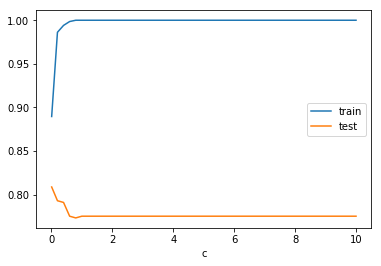

In [16]:
cv_scores = pd.DataFrame({
    'c':C_arr,
    'train':grid_search.cv_results_['mean_train_score'],
    'test':grid_search.cv_results_['mean_test_score']    
})

ax = cv_scores.plot(x='c', y=['train', 'test'])

The best model with a linear kerel is the one with the minimum possible C. This is a model that is not tolerant of misclassifications. This might be evidence that a linear kernel isn't the right fit.

In [17]:
print('Best parameters:', grid_search.best_params_)
print()
print('Best Model:', grid_search.best_estimator_)

Best parameters: {'C': 0.01}

Best Model: SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [18]:
y_tn_pred_svc = grid_search.best_estimator_.predict(X_train_scaled)
y_tt_pred_svc = grid_search.best_estimator_.predict(X_test_scaled)

In [19]:
print("\nSVC w. Linear Kernel & GridSearchCV  Test Confusion Matrix")
print(skm.confusion_matrix(y_test, y_tt_pred_svc))
print("\nSVC w. Linear Kernel & GridSearchCV  Test Classification Report")
print(skm.classification_report(y_test, y_tt_pred_svc))


SVC w. Linear Kernel & GridSearchCV  Test Confusion Matrix
[[13  0  0  0  0  0  1  0  0]
 [ 0 22  0  2  1  0  0  0  0]
 [ 0  1 14  0  0  0  0  0  0]
 [ 0  5  0 17  0  0  0  1  0]
 [ 0  0  0  1 25  0  0  0  3]
 [ 0  0  0  0  0 14  1  0  0]
 [ 1  0  0  0  0  0 15  0  0]
 [ 0  3  0  5  2  0  0  4  0]
 [ 0  0  0  1  2  0  0  0 14]]

SVC w. Linear Kernel & GridSearchCV  Test Classification Report
             precision    recall  f1-score   support

   asphalt        0.93      0.93      0.93        14
  building        0.71      0.88      0.79        25
       car        1.00      0.93      0.97        15
  concrete        0.65      0.74      0.69        23
     grass        0.83      0.86      0.85        29
      pool        1.00      0.93      0.97        15
    shadow        0.88      0.94      0.91        16
      soil        0.80      0.29      0.42        14
      tree        0.82      0.82      0.82        17

avg / total       0.83      0.82      0.81       168



## 5. Support Vector Machine Classifier + Polynomial Kernel + Grid Search

In [20]:
svc_poly = svm.SVC(kernel='poly')

In [21]:
parameters = {
    'C': C_arr,
    'degree': [2, 3, 4, 5, 6]
}

grid_search_svc_poly = GridSearchCV(svc_poly, parameters, cv=5, refit=True, n_jobs=-1, verbose=1)
grid_search_svc_poly.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 255 candidates, totalling 1275 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 1275 out of 1275 | elapsed:   54.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([ 0.01,  0.2 ,  0.4 ,  0.6 ,  0.8 ,  1.  ,  1.2 ,  1.4 ,  1.6 ,
        1.8 ,  2.  ,  2.2 ,  2.4 ,  2.6 ,  2.8 ,  3.  ,  3.2 ,  3.4 ,
        3.6 ,  3.8 ,  4.  ,  4.2 ,  4.4 ,  4.6 ,  4.8 ,  5.  ,  5.2 ,
        5.4 ,  5.6 ,  5.8 ,  6.  ,  6.2 ,  6.4 ,  6.6 ,  6.8 ,  7.  ,
        7.2 ,  7.4 ,  7.6 ,  7.8 ,  8.  ,  8.2 ,  8.4 ,  8.6 ,  8.8 ,
        9.  ,  9.2 ,  9.4 ,  9.6 ,  9.8 , 10.  ]), 'degree': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [22]:
print('Best parameters:', grid_search_svc_poly.best_params_)
print()
print('Best Model:', grid_search_svc_poly.best_estimator_)

Best parameters: {'C': 8.4, 'degree': 3}

Best Model: SVC(C=8.4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [23]:
y_tt_pred_svc_poly = grid_search_svc_poly.best_estimator_.predict(X_test_scaled)

In [24]:
print("\nSVC w. Poly Kernel & GridSearchCV  Test Confusion Matrix")
print(skm.confusion_matrix(y_test, y_tt_pred_svc_poly))
print("\nSVC w. Poly Kernel & GridSearchCV  Test Classification Report")
print(skm.classification_report(y_test, y_tt_pred_svc_poly))


SVC w. Poly Kernel & GridSearchCV  Test Confusion Matrix
[[13  0  0  0  0  0  1  0  0]
 [ 0 22  0  2  1  0  0  0  0]
 [ 0  2 11  0  0  1  0  1  0]
 [ 0  5  0 17  0  0  0  1  0]
 [ 0  0  0  0 26  0  0  1  2]
 [ 0  0  0  0  0 14  1  0  0]
 [ 2  0  0  0  0  0 14  0  0]
 [ 0  3  0  4  6  0  0  1  0]
 [ 0  0  0  1  3  0  0  0 13]]

SVC w. Poly Kernel & GridSearchCV  Test Classification Report
             precision    recall  f1-score   support

   asphalt        0.87      0.93      0.90        14
  building        0.69      0.88      0.77        25
       car        1.00      0.73      0.85        15
  concrete        0.71      0.74      0.72        23
     grass        0.72      0.90      0.80        29
      pool        0.93      0.93      0.93        15
    shadow        0.88      0.88      0.88        16
      soil        0.25      0.07      0.11        14
      tree        0.87      0.76      0.81        17

avg / total       0.76      0.78      0.76       168



## 6. Support Vector Machine Classifier + RBF Kernel + Grid Search

In [25]:
svc_rbf = svm.SVC(kernel='rbf')

parameters = {
    'C': C_arr,
    'gamma': [0.1, 1, 10, 100]
}

grid_search_svc_rbf = GridSearchCV(svc_rbf, parameters, cv=5, refit=True, n_jobs=-1, verbose=1)
grid_search_svc_rbf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 204 candidates, totalling 1020 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1020 out of 1020 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([ 0.01,  0.2 ,  0.4 ,  0.6 ,  0.8 ,  1.  ,  1.2 ,  1.4 ,  1.6 ,
        1.8 ,  2.  ,  2.2 ,  2.4 ,  2.6 ,  2.8 ,  3.  ,  3.2 ,  3.4 ,
        3.6 ,  3.8 ,  4.  ,  4.2 ,  4.4 ,  4.6 ,  4.8 ,  5.  ,  5.2 ,
        5.4 ,  5.6 ,  5.8 ,  6.  ,  6.2 ,  6.4 ,  6.6 ,  6.8 ,  7.  ,
        7.2 ,  7.4 ,  7.6 ,  7.8 ,  8.  ,  8.2 ,  8.4 ,  8.6 ,  8.8 ,
        9.  ,  9.2 ,  9.4 ,  9.6 ,  9.8 , 10.  ]), 'gamma': [0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [26]:
print('Best parameters:', grid_search_svc_rbf.best_params_)
print()
print('Best Model:', grid_search_svc_rbf.best_estimator_)

Best parameters: {'C': 1.4000000000000001, 'gamma': 0.1}

Best Model: SVC(C=1.4000000000000001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [27]:
y_tt_pred_svc_rbf = grid_search_svc_rbf.best_estimator_.predict(X_test_scaled)

In [28]:
print("\nSVC w. Linear Kernel & GridSearchCV  Test Confusion Matrix")
print(skm.confusion_matrix(y_test, y_tt_pred_svc_rbf))
print("\nSVC w. Linear Kernel & GridSearchCV  Test Classification Report")
print(skm.classification_report(y_test, y_tt_pred_svc_rbf))


SVC w. Linear Kernel & GridSearchCV  Test Confusion Matrix
[[ 0  0  0 14  0  0  0  0  0]
 [ 0 17  0  7  0  0  0  0  1]
 [ 0  0  0 15  0  0  0  0  0]
 [ 0  3  0 20  0  0  0  0  0]
 [ 0  0  0  9  9  0  0  0 11]
 [ 0  0  0 15  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  4]
 [ 0  0  0 13  1  0  0  0  0]
 [ 0  0  0  1  0  0  0  0 16]]

SVC w. Linear Kernel & GridSearchCV  Test Classification Report
             precision    recall  f1-score   support

   asphalt        0.00      0.00      0.00        14
  building        0.85      0.68      0.76        25
       car        0.00      0.00      0.00        15
  concrete        0.19      0.87      0.31        23
     grass        0.90      0.31      0.46        29
      pool        0.00      0.00      0.00        15
    shadow        0.00      0.00      0.00        16
      soil        0.00      0.00      0.00        14
      tree        0.50      0.94      0.65        17

avg / total       0.36      0.37      0.30       168



/Users/rowena/miniconda3/envs/msca/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 7. Comparison of Models

In this assignment there were many models built: RandomForest, Linear SVC, Linear SVC w. CV, Poly SVC, and Radial SVC. The base model RandomForest performed pretty well and even outperformed the Linear SVC base model with the default hyperparameters. The tuning during k-fold cross validation improved the Linear SVC quite a bit, increasing the test percision three percentage points. 

The linear and poly models performed very similarly. The polynomial degree hypterparameter was only two so on scaled data it could be that it ended up looking very similar to the linear classifier. It's likely that is the case given the similiaries in the classification report and confusion matrix. The radial kernel performed the worst out of all the models with less than half the precision of the linear or polynomial kernels.

Overall the best model accoriding to the test classfication report is the linear SVC with tuned hyperparameters. While the polynomial kernel had the same perfomance metrics, it introduced unnecessary complexity so a simpler model is preferred.

## 8. Comparison of Kernels

During the grid search cross-validation phase, three different kernels were compared: linear, polynomial, and radial. The linear and polynomial kernels in this homework resulted in models with almost the exact same outputs. The radial kernel looked completely different however. The benefits and downsides of using one kernel over another is all about the true decision boundary. If the decision boundary is in fact linear, then nothing will outperform a linear kernal. If it's a tad non-linear then a polynomial kernal will help approximate that. If the decision boundary is more localized then a radial kernel will work better. If the decision boundary is linear, a radial kernel will do an awful job as we see here, because it's effectively trying to draw a circle around a line. 

## 9. Explanation of Hyperparameters

The hyperparameter of C is used in all three SVC models built in this assignment. In a SVC, the total error cannot exceed C. Error is whenever a datapoint is misclassified (-1) or falls within the margin. A high value for C means a wide margin and a higher tolerance for misclassification. A very low C means a low tolerance for misclassification and a tigher margin. The optimization problem will differ greatly depending on the value of C. A C too large will overfit the data and a C too small will tend to underfit but not giving enough weight to points farther from the margin.

## 10. Overfitting Check

In [29]:
svc_cv = grid_search.best_estimator_

print(svc_cv.score(X_train_scaled, y_tn_pred_svc))
print(svc_cv.score(X_test_scaled, y_tt_pred_svc))

print(skm.classification_report(y_train, svc_cv.predict(X_train_scaled)))
print(skm.classification_report(y_test, svc_cv.predict(X_test_scaled)))

1.0
1.0
             precision    recall  f1-score   support

   asphalt        0.93      0.89      0.91        45
  building        0.85      0.90      0.87        97
       car        1.00      0.90      0.95        21
  concrete        0.87      0.89      0.88        93
     grass        0.91      0.84      0.88        83
      pool        1.00      0.86      0.92        14
    shadow        0.86      0.96      0.91        45
      soil        1.00      0.55      0.71        20
      tree        0.87      0.96      0.91        89

avg / total       0.89      0.89      0.89       507

             precision    recall  f1-score   support

   asphalt        0.93      0.93      0.93        14
  building        0.71      0.88      0.79        25
       car        1.00      0.93      0.97        15
  concrete        0.65      0.74      0.69        23
     grass        0.83      0.86      0.85        29
      pool        1.00      0.93      0.97        15
    shadow        0.88      0.94  

The score and classification report for train and test are very similar. With overfitting we would expect the train scores to be much much higher than the test scores. This shows that overfitting is a slight but not huge problem with this model.